# Goal: 
### To generate initial conditions in 6D phase-space of N stars in a Plummer potential

Source 0: GitHub co-pilot

Source 1:
http://corysimon.github.io/articles/uniformdistn-on-sphere/

Source 2: Inverse transform sampling: https://en.wikipedia.org/wiki/Inverse_transform_sampling


Source 3: 
Galactic Dynamics: Binney and Tremain 

Source 4: Lecture notes of Prof. Gary Mamon

Source 5: Conversations with Prof. Paola Di Matteo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys 
sys.path.append('../src/')
import genInitCond as GIC
from astropy import constants as const
from astropy import units as u

# Initial radial distance

Step 1: begin with the equation for the total mass within radius r.

The enclosed mass as a function of the radial distance from the center, r, is:

$$ M(r)  = M_t \frac{r^3}{\left( r^2 + a^2\right)^{3/2}} $$

But we wish to de-dimensionalize this with $M_X = \left(M_r/M_t\right) $ and $r_X = \left(r/a\right) $. Thus,

$$M_X  = \frac{r_X^3}{\left( 1+ r_X^2 \right)^{3/2}} $$

and we can invert for position given a certain amount of enclosed mass:

$$ r_X = \sqrt{M_X^{2/3} / \left(1-M_X^{2/3}\right)} $$


### Mass profile

Text(0.5, 1.0, 'Mass Profile')

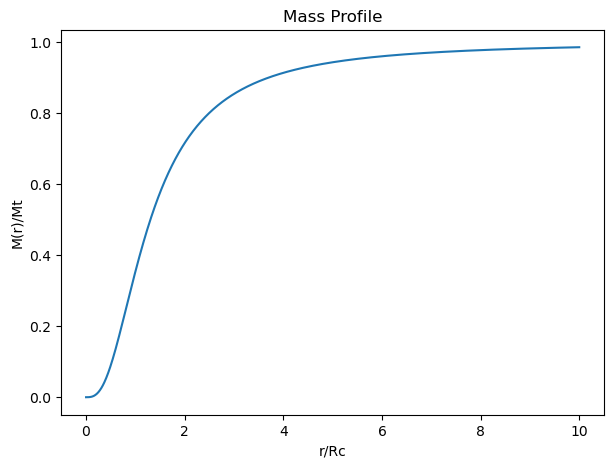

In [2]:
NP,Mt,Rc = 1000,10000,5
rGrid=np.linspace(0,10*Rc,NP)
mProf=GIC.PlummerMassProfile(Mt,Rc,rGrid)
fig,ax=plt.subplots(1,1,figsize=(7,5))
ax.plot(rGrid/Rc,mProf/Mt)
ax.set_xlabel('r/Rc')
ax.set_ylabel('M(r)/Mt')
ax.set_title("Mass Profile")

## (2) Inverse transform sampling 

A practical way of obtaining an appropriate sample of any random variable, $X$, is to use the *Inverse transform sampling* technique. In an nutshell, it would be tedious to have a computer functions available to sample from all possible distribution functions yet it's easy for a computer to generate numbers sampled from a uniform distribution. *Inverse transform sampling* allows us to start from a sample of numbers generated drawn from a uniformly random distribution and subsequently sample any random variable as long as we know the random variable's *cumulative distribution function*, $\mathcal{F}(x)$, which is the cummulative intergral of the corresponding probability density function, $f$:

$$\mathcal{F}(x)= \int_{-\infty}^x f(x')dx'$$

This can be thought of in two ways, one is that the cumulative distribution function is the probability that the true value of the random variable, $X$, is less than or equal to a given value, $x_0$. the other is that, if thinking about multiple realizations of the random variable, $X$, the cumulative distribution function is the fraction of realizations that are less than or equal to $x_0$. In this case, we opt for the later interpretation, which in turn means that the mass profile is the cumulative distribution function of the radial distance, $r_X$. Thus, we can use the cumulative distribution function to generate a sample of random variables, $X$, by first generating a sample of uniform random variables, $U$, and then applying the inverse of the cumulative distribution function to the uniform random variables:







## Proof


Formally, the probability of drawing a number, $x$, less than a given number $x_0$ is equal to the value of the CDF at $x_0$:

$$ \mathcal{P}(x<x_0) = \mathcal{F}(x_0) $$

and note that since CDFs are monotonically increasing and one-to-one. Thus, we can equate the probabilies in either the space of the variable or CDF:

$$ \mathcal{P}(F(x)<F(x_0)) = \mathcal{P}(x<x_0) = \mathcal{F}(x_0) $$



Since $F(x)$ is a number between [0,1], we can generate this number by drawing from the uniform distribution, $\mathcal{U}$, which has equal probability of across the domain of zero to one and is defined as:

$$ \mathcal{U}(x) = \begin{cases} 1 & \text{if } x \in [0,1] \\ 0 & \text{otherwise} \end{cases}. $$

Many packages exist to draw from this, for instance numpy's random, `np.random.rand()`. Next, we can say that the probability of drawing a random number from  $\mathcal{U}$ and having it be less than the CDF evaluated at $x_0$ is equal to the CDF evaluated at $F(x_0)$:

$$ \mathcal{P}\left(\mathcal{U}<\mathcal{F}(x_0)\right) = \mathcal{F}(x_0). $$

As before, we can either work in the space of the variable or the CDF, thus we can now perform the inverse transform to return to the space of the variable:


$$\mathcal{P}\left(\mathcal{F}^{-1}(\mathcal{U})<\mathcal{F}^{-1}\left(\mathcal{F}(x_0)\right)\right) =\mathcal{F}(x_0)$$

$$\mathcal{P}\left(\mathcal{F}^{-1}(\mathcal{U})<x_0\right) =\mathcal{F}(x_0)$$

and notice form before 

$$\mathcal{P}\left(\mathcal{F}^{-1}(\mathcal{U})<x_0\right) = \mathcal{P}(x<x_0)=\mathcal{F}(x_0)$$

and finally we arrive at the desired result:

 
$$ F^{-1}(\mathcal{U}) = x $$




In [3]:
# random uniform sampling of the enclused mass
Mxs=np.random.rand(NP)
# inverse transform sampling for the radius
rAll=GIC.PlummerRadius(Mxs,Rc)
# generate a grid for showing the mass profile on a plot 
rGrid=np.linspace(0,rAll.max(),NP)
# get the mass profile
MencProf=GIC.PlummerMassProfile(Mt,Rc,rGrid)
# do a subset for the displace
Msub=np.random.choice(Mxs,40)
rsub=GIC.PlummerRadius(Msub,Rc)
MYs=GIC.PlummerMassProfile(Mt,Rc,rsub)
# set the number of bins equal to the square root of the counts
NBins=int(4*np.sqrt(len(rAll)))

Text(0.5, 0.98, 'Demo of inverse sampling')

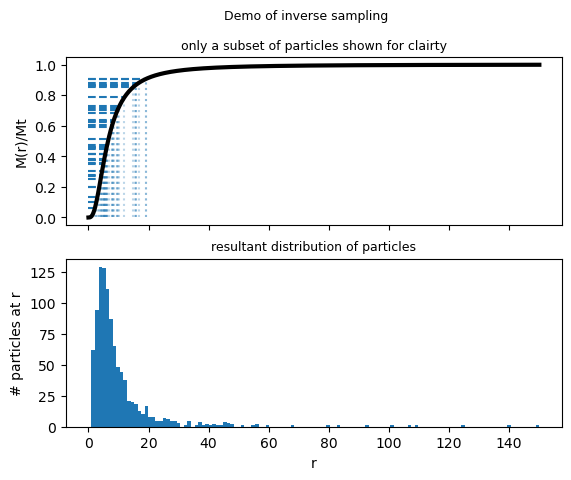

In [4]:
fig,ax=plt.subplots(2,1,sharex=True)
ax[0].hlines(Msub,0,rsub,linestyle='dashed')
ax[0].vlines(rsub,0,MYs/Mt,linestyle='dotted',alpha=0.3)
ax[0].set_ylabel('M(r)/Mt')
ax[1].set_xlabel('r')
ax[0].plot(rGrid,MencProf/Mt, 'k-', linewidth=3)
ax[1].hist(rAll,bins=NBins)
ax[0].set_title("only a subset of particles shown for clairty",size=9)
ax[1].set_ylabel('# particles at r')
ax[1].set_title("resultant distribution of particles",size=9)
fig.suptitle("Demo of inverse sampling",size=9)


## Generating positions on a sphere

Since say that out system has spherical symmetry, polar coordinates is an obvious choice. To complete our inital conditions, we maybe tempted to randomly sample $\phi$ and $\theta$. However, this is incorrect because we will have to many points at the poles. Below demonstrates the correct and incorrect sampling

In [37]:
phi,theta,thetaWRONG = GIC.UniformSphere(NP)

We see that the uniform sampling of $\phi$ and $\theta$ gives too many points at the poles. 

A better way to conceptualize spherical symmetry is that we should have an equal probability of existing anywhere on the surface of the sphere.

$$\int f\left(\nu\right) dA = 1$$

Also, we know that the surface area on the unit sphere is equal to 

$$\int  dA = 4\pi$$

This, we can say that $f\left(\nu\right)=1/4\pi $

Yet, we wish to reparameterize  $f\left(\nu\right)$ in terms of  $\theta$ and $\phi$. Thus, we can establish the following inequalities 

$$f\left(\nu\right)\textrm{d}A = (1/4\pi) \textrm{d}A$$

and knowing that in general $dA$ on the unit sphere is $\textrm{d}A = \sin(\theta) \textrm{d}\theta \textrm{d}\phi$, we can say that 

$$ (1/4\pi) \textrm{d}A = (1/4\pi) \sin(\theta) \textrm{d}\theta \textrm{d}\phi = f\left(\theta,\phi\right) \textrm{d}\theta \textrm{d}\phi$$
 
thus, we can now establish that


$$ f\left(\theta,\phi\right) = (1/4\pi) \sin(\theta)$$


Also, now since the variables are not dependent on one another, we can marginalize over them easliy without using conditional probailities to find the PDFs of just the variables alone. 

$$ f\left(\theta\right)=\int_{0}^{2\pi} f\left(\theta,\phi\right)d\phi = \sin\left(\theta\right)/2 $$

$$ f\left(\phi\right)=\int_{-\pi/2}^{\pi/2} f\left(\theta,\phi\right)d\theta = 1/(2\pi) $$

Now we have two normalized probability distribution functions for each of our variables. We can now perform inverse sampling technique once we have the cummulative density function:

$$F\left(\phi\right)=\int_{0}^{\phi} f(\phi') d\phi'$$

$$F\left(\theta\right)=\int_{-\pi/2}^{\theta} f(\theta') d\theta'$$

Thus, the cummulative density function is:
 
$$ F\left(\theta\right)=\int_{-\pi/2}^{\theta} \sin\left(\theta'\right)/2 d\theta'  = \frac{1}{2}\left(1-\cos\left(\theta\right)\right)$$



And thus, to get the random sampling in $\theta$, we can take the inverse of this CDF:

$$\theta = F^{-1}\left(\mathcal{U}\right)=\arccos\left(1-2u\right)$$

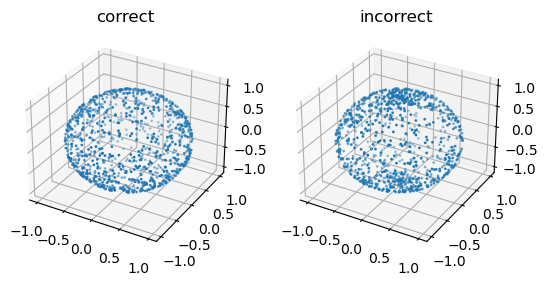

In [38]:
# plot these points on a unit sphere
fig = plt.figure()
ax=fig.add_subplot(121,projection='3d')
ax.scatter(np.sin(theta)*np.cos(phi),np.sin(theta)*np.sin(phi),np.cos(theta),s=1)
ax1=fig.add_subplot(122,projection='3d')
ax1.scatter(np.sin(thetaWRONG)*np.cos(phi),np.sin(thetaWRONG)*np.sin(phi),np.cos(thetaWRONG),s=1)
ax.set_title("correct")
ax1.set_title("incorrect");

# all together for init posit

In [7]:
x=rAll*np.sin(theta)*np.cos(phi)
y=rAll*np.sin(theta)*np.sin(phi)
z=rAll*np.cos(theta)

(-30.026704384733552, 30.026704384733552)

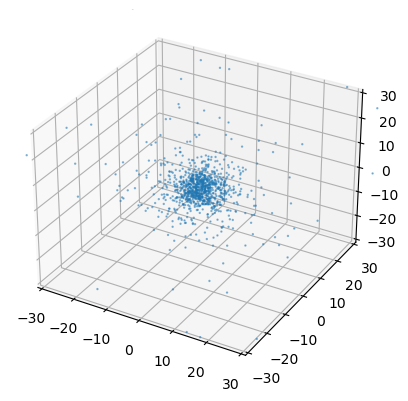

In [8]:
# make a 3D scatter plot of these points
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(x,y,z,alpha=0.5,s=0.5)
limits=np.array([-1,1])*rAll.max()/5
ax.set_xlim(limits)
ax.set_ylim(limits)
ax.set_zlim(limits)


# Generating the velocities


There are many ways to solve this problem for the initial velocities. Here we will begin with the distirbution function: 

$$\mathcal{f}\propto -E^{-7/2}$$

Where the orbital energy is given as:

$$E= \frac{1}{2} v^2 - \frac{GM}{\sqrt{r^2 + a^2}} $$

What's important is that when integrating over the velocities, we do not integrate over all possible velocities, but only until the escape velocity, otherwise the $\mathcal{f}$ would be negative. The distribution 

$$v_{esc}^2 = 2\frac{GM}{\sqrt{r^2 + a^2}}$$

Now, unlike the mass, we are not going to sample from the same distribution, but rather all particles are going to generate there own probability density function for the velocities. Thus, we can find the derivative of the counters per velocity as:

$$\frac{dN}{dv} = \mathcal{f(v|r)}4\pi v^2 dv$$

Then, we can obtain the CDF as:

$$ CDF(v|r) = \int_{0}^{v_{esc}} \frac{dN}{dv} dv$$





In [34]:
# Get G. see units notebook
outunits=u.pc * (u.km / u.s)**2 / (u.Msun)
G = const.G.to(outunits).value
vx,vy,vz,speed,CDFAll,testVels,rannums=GIC.velocitySampling(GIC.DFPlummer,Mt,Rc,rAll,G=G,storeCDF=True)

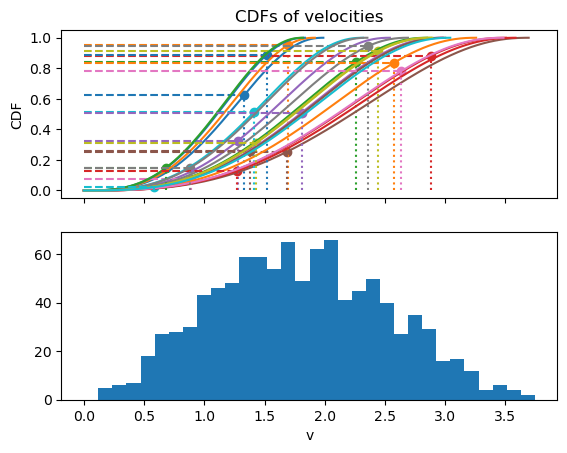

In [35]:
NBins=int(np.sqrt(len(speed)))
fig,ax=plt.subplots(2,1,sharex=True)
for i in range(0,NP,50):
    handl,=ax[0].plot(testVels[i,:],CDFAll[i,:])
    ax[0].scatter(speed[i],rannums[i],color=handl.get_color())
    # add the horizontal line
    ax[0].hlines(rannums[i],0,speed[i],linestyle='dashed',color=handl.get_color())
    # add the vertical line
    ax[0].vlines(speed[i],0,rannums[i],linestyle='dotted',color=handl.get_color())

ax[1].set_xlabel('v')
ax[0].set_ylabel('counts')
ax[0].set_ylabel('CDF')
ax[0].set_title("CDFs of velocities")
ax[1].hist(speed,bins=NBins);

Text(0.5, 0, 'vz')

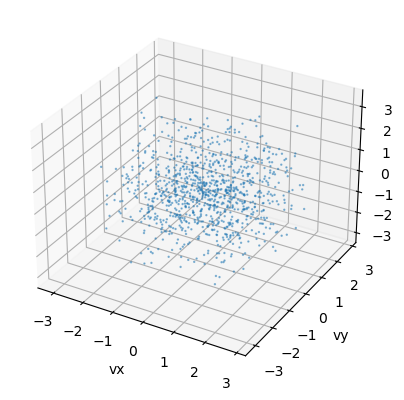

In [36]:
# plot 3D scatter of the velocity
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(vx,vy,vz,alpha=0.5,s=0.5)
# add the labels
ax.set_xlabel('vx')
ax.set_ylabel('vy')
ax.set_zlabel('vz')


In [13]:
# save the data
import os 
# make a directory to save the data
os.makedirs('../../initconds/',exist_ok=True)
np.savetxt('../initconds/Plummer-{:d}-particles.txt'.format(NP),np.c_[x,y,z,vx,vy,vz])